In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file.
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

# Dataframe

In [3]:
# Define dataframe
df = pd.read_csv("imputed_training_data.csv")
columns_to_read = ['action_occured_0_5', 'action_occured_5_10', 'action_occured_10_15','action_occured_15_20','action_occured_20_25','action_occured_25_30']
df_indicator = pd.read_csv("training_data4.csv",usecols=columns_to_read)
df = pd.concat([df, df_indicator], axis=1)
df = df[:2254]
df = df.drop(df.columns[[0,1]], axis=1)
df = df.drop(columns="id")
df = df.drop(columns="index")
df = df.drop(columns="index_0_5")
df = df.drop(columns="index_5_10")
df = df.drop(columns="index_10_15")
df = df.drop(columns="index_15_20")
df = df.drop(columns="index_20_25")
df = df.drop(columns="index_25_30")
column_name_changes = {'min_word_count':'max_word_count',
                       'min_word_count_0_5':'max_word_count_0_5',
                       'min_word_count_5_10':'max_word_count_5_10',
                       'min_word_count_10_15':'max_word_count_10_15',
                       'min_word_count_15_20':'max_word_count_15_20',
                       'min_word_count_20_25':'max_word_count_20_25',
                       'min_word_count_25_30':'max_word_count_25_30',
                       'max_word_count':'min_word_count',
                       'max_word_count_0_5':'min_word_count_0_5',
                       'max_word_count_5_10':'min_word_count_5_10',
                       'max_word_count_10_15':'min_word_count_10_15',
                       'max_word_count_15_20':'min_word_count_15_20',
                       'max_word_count_20_25':'min_word_count_20_25',
                       'max_word_count_25_30':'min_word_count_25_30',
                       'min_action_time':'max_action_time',
                       'min_action_time_0_5':'max_action_time_0_5',
                       'min_action_time_5_10':'max_action_time_5_10',
                       'min_action_time_10_15':'max_action_time_10_15',
                       'min_action_time_15_20':'max_action_time_15_20',
                       'min_action_time_20_25':'max_action_time_20_25',
                       'min_action_time_25_30':'max_action_time_25_30',
                       'max_action_time':'min_action_time',
                       'max_action_time_0_5':'min_action_time_0_5',
                       'max_action_time_5_10':'min_action_time_5_10',
                       'max_action_time_10_15':'min_action_time_10_15',
                       'max_action_time_15_20':'min_action_time_15_20',
                       'max_action_time_20_25':'min_action_time_20_25',
                       'max_action_time_25_30':'min_action_time_25_30',
                       'min_inter_action_time':'max_inter_action_time',
                       'min_inter_action_time_0_5':'max_inter_action_time_0_5',
                       'min_inter_action_time_5_10':'max_inter_action_time_5_10',
                       'min_inter_action_time_10_15':'max_inter_action_time_10_15',
                       'min_inter_action_time_15_20':'max_inter_action_time_15_20',
                       'min_inter_action_time_20_25':'max_inter_action_time_20_25',
                       'min_inter_action_time_25_30':'max_inter_action_time_25_30',
                       'max_inter_action_time':'min_inter_action_time',
                       'max_inter_action_time_0_5':'min_inter_action_time_0_5',
                       'max_inter_action_time_5_10':'min_inter_action_time_5_10',
                       'max_inter_action_time_10_15':'min_inter_action_time_10_15',
                       'max_inter_action_time_15_20':'min_inter_action_time_15_20',
                       'max_inter_action_time_20_25':'min_inter_action_time_20_25',
                       'max_inter_action_time_25_30':'min_inter_action_time_25_30'}
df.rename(columns=column_name_changes, inplace=True)
#df.to_csv('dataset_for_correlation_table.csv')
df.head()

,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
0,0.400000,0.560000,0.000000,0.000000,0.0,0.04,0.0,0.171817,2557.0,2.0,...,3409.391892,17976.440849,8.310227,3.5,1,1,1,1,1,1
1,0.486486,0.324324,0.108108,0.081081,0.0,0.00,0.0,0.118289,2454.0,3.0,...,2630.726415,13556.384903,6.555030,3.5,1,1,1,1,1,1
2,0.500000,0.475000,0.025000,0.000000,0.0,0.00,0.0,0.152399,4136.0,4.0,...,584.396419,4680.999225,13.580859,6.0,1,1,1,1,1,1
3,0.187500,0.812500,0.000000,0.000000,0.0,0.00,0.0,0.103780,1556.0,2.0,...,12049.176605,17253.751125,4.322375,2.0,1,1,1,1,1,0
4,0.589744,0.358974,0.000000,0.051282,0.0,0.00,0.0,0.210248,2531.0,3.0,...,829.014599,3764.831099,8.236028,4.0,1,1,1,1,1,1


In [4]:
# Divide feature and target
y = df["score"]
X = df.drop(columns='score', axis=1)

In [5]:
# Determine the number of rows/columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 2254
Number of columns: 252


# EDA

## Scores

In [6]:
print("Mean of scores:", y.mean())
print("Median of scores:", y.median())
print("Standard deviation of scores:", y.std())
print()
df["score"].value_counts()

Mean of scores: 3.7236024844720497
Median of scores: 4.0
Standard deviation of scores: 1.0219092050462317



4.0    454
3.5    451
4.5    375
3.0    294
2.5    189
5.0    164
5.5    120
2.0     79
1.5     56
1.0     34
6.0     33
0.5      5
Name: score, dtype: int64

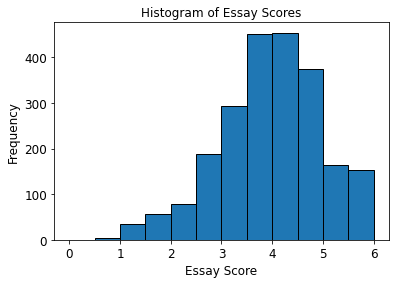

In [7]:
plt.hist(y, bins=np.arange(0, 6.5, 0.5), edgecolor='black')
plt.xlabel("Essay Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of Essay Scores", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Score.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## Univariate

In [8]:
print("\nSummary statistics for numerical features:")
df.describe()


Summary statistics for numerical features:


,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,...,2.254000e+03,2.254000e+03,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,0.352659,0.583261,0.025130,0.025788,0.004121,0.005009,0.004033,0.132502,3392.558119,2.429902,...,2.068594e+04,2.389770e+04,7.738579,3.723602,0.989796,0.989796,0.992458,0.980479,0.967169,0.925466
std,0.169231,0.194921,0.046643,0.060500,0.017330,0.026015,0.018033,0.075985,1538.986319,2.108721,...,7.530610e+04,6.516172e+04,5.865182,1.021909,0.100521,0.100521,0.086537,0.138377,0.178232,0.262696
min,0.000000,-1.000000,0.000000,-0.041667,0.000000,-0.100000,0.000000,0.000000,262.000000,0.000000,...,6.212864e+01,1.327592e+01,-2.232224,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.078586,2208.000000,1.000000,...,6.389821e+02,2.622955e+03,3.174765,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.375000,0.551372,0.000000,0.000000,0.000000,0.000000,0.000000,0.118384,3087.000000,2.000000,...,1.460644e+03,6.779871e+03,7.063662,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.475000,0.708333,0.034043,0.037037,0.000000,0.000000,0.000000,0.170249,4299.250000,3.000000,...,9.234782e+03,2.010994e+04,10.853229,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.250000,1.000000,0.473684,2.000000,0.277778,0.717391,0.428571,0.722795,12876.000000,11.000000,...,1.213358e+06,1.052140e+06,60.018785,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


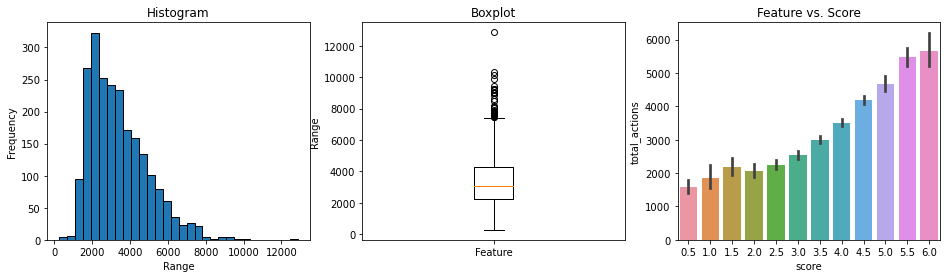

In [9]:
# Uni- and bi-variate plots using "total_actions" feature as an example

feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(feature, bins=30, edgecolor='black')

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(feature)
ax[1].set_xticklabels(['Feature'])

# Catplot
ax[2].set_title('Feature vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Feature')
sns.barplot(data=df, x="score", y="total_actions", ax=ax[2])

plt.savefig('EDA.svg')
plt.show()

In [10]:
# # Considering all features

# for i in df.columns:

#   print(i)
#   feature = df[i]
#   fig, ax = plt.subplots(1,3, figsize=(16,4))

#   # Histogram
#   ax[0].set_title('Histogram')
#   ax[0].set_xlabel('Range')
#   ax[0].set_ylabel('Frequency')
#   ax[0].hist(feature, bins=30)

#   # Boxplot
#   ax[1].set_title('Boxplot')
#   ax[1].set_ylabel('Range')
#   ax[1].boxplot(feature)
#   ax[1].set_xticklabels(['Feature'])

#   # Catplot
#   ax[2].set_title('Feature vs. Score')
#   ax[2].set_xlabel('Score')
#   ax[2].set_ylabel('Feature')
#   sns.barplot(data=df, x="score", y=i, ax=ax[2])

#   plt.show()

## Bivariate

In [11]:
# Correlation between two features
corr = df.corr()
corr

,comma,period,dash,qm,ep,sc,colon,revision_ratio,total_actions,one_min_pause_count,...,mean_inter_action_time_25_30,std_inter_action_time_25_30,skew_inter_action_time_25_30,score,action_occured_0_5,action_occured_5_10,action_occured_10_15,action_occured_15_20,action_occured_20_25,action_occured_25_30
comma,1.000000,-0.895464,0.124539,0.011482,-0.021130,-0.002867,-0.041496,0.073048,0.337484,-0.096431,...,-0.036197,-0.041308,0.073655,0.458520,0.001860,0.001860,0.062497,0.033447,0.037522,0.019380
period,-0.895464,1.000000,-0.364461,-0.325495,-0.096064,-0.142442,-0.073149,-0.102290,-0.382021,0.118793,...,0.037925,0.037928,-0.090103,-0.488681,-0.006851,-0.006851,-0.072398,-0.051740,-0.038943,-0.023824
dash,0.124539,-0.364461,1.000000,0.003412,0.008406,0.067669,0.067104,0.070880,0.210081,-0.046871,...,-0.018694,-0.010293,0.023344,0.237140,0.013785,0.013785,0.023950,0.034954,0.039720,0.021200
qm,0.011482,-0.325495,0.003412,1.000000,0.071688,-0.011015,-0.006183,0.019446,0.071189,-0.042493,...,0.004341,0.021258,0.059622,0.100080,0.001850,0.001850,0.037166,0.022448,-0.004423,0.013291
ep,-0.021130,-0.096064,0.008406,0.071688,1.000000,-0.012541,0.031474,-0.013401,0.006991,-0.035412,...,0.011118,-0.001426,0.006983,0.007247,-0.008111,-0.008111,0.020735,0.011439,-0.080312,-0.063044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
action_occured_5_10,0.001860,-0.006851,0.013785,0.001850,-0.008111,0.009543,0.008760,0.047414,0.093036,0.045832,...,0.019564,0.025497,-0.010586,0.089195,1.000000,1.000000,0.297299,-0.014327,-0.018707,0.004802
action_occured_10_15,0.062497,-0.072398,0.023950,0.037166,0.020735,-0.020800,0.019502,0.013770,0.094135,0.027505,...,-0.032828,-0.061278,0.002303,0.114442,0.297299,0.297299,1.000000,0.135963,0.099049,0.053359
action_occured_15_20,0.033447,-0.051740,0.034954,0.022448,0.011439,0.025721,0.031566,0.102572,0.139707,0.005956,...,-0.275515,-0.296887,0.020908,0.120336,-0.014327,-0.014327,0.135963,1.000000,0.333933,0.204159
action_occured_20_25,0.037522,-0.038943,0.039720,-0.004423,-0.080312,0.021150,0.027585,0.087984,0.147901,0.044655,...,-0.311933,-0.342930,0.049583,0.081750,-0.018707,-0.018707,0.099049,0.333933,1.000000,0.307945


In [12]:
# Determine pairs above set threshold
threshold = 0.8
print("Strong correlations:")
for i in range(len(corr.columns)):
  for j in range(i+1, len(corr.columns)):
    if abs(corr.iloc[i,j]) > threshold:
      print(f"{corr.columns[i]} and {corr.columns[j]}: {corr.iloc[i,j]}")

Strong correlations:
comma and period: -0.8954642124829002
total_actions and max_word_count: 0.8169111685624548
total_actions and median_word_count: 0.822984881830162
total_actions and mean_word_count: 0.82791290433322
total_actions and std_word_count: 0.8202487385295226
one_min_pause_count and one_min_pause_to_output_ratio: 0.8782247029573881
comma_0_5 and comma_5_10: 1.0
period_0_5 and period_5_10: 1.0
dash_0_5 and dash_5_10: 1.0
qm_0_5 and qm_5_10: 1.0
ep_0_5 and ep_5_10: 1.0
sc_0_5 and sc_5_10: 1.0
colon_0_5 and colon_5_10: 1.0
revision_ratio_0_5 and revision_ratio_5_10: 1.0
total_actions_0_5 and total_actions_5_10: 1.0
total_actions_0_5 and max_word_count_0_5: 0.8640050004942726
total_actions_0_5 and median_word_count_0_5: 0.8197759950700048
total_actions_0_5 and mean_word_count_0_5: 0.840737931878717
total_actions_0_5 and std_word_count_0_5: 0.8440510749283171
total_actions_0_5 and max_word_count_5_10: 0.8640050004942726
total_actions_0_5 and median_word_count_5_10: 0.81977599507

In [13]:
# Correlations with score (in descending order)

# Get the last column name
last_column_name = 'score'

# Calculate correlations with the last column
correlations = df.corrwith(df[last_column_name])

# Sort correlations in descending order
correlations_sorted = correlations.sort_values(ascending=False)

# Set Pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the correlations in descending order
print(f"Correlations with {last_column_name} (in descending order):")
print(correlations_sorted)

# Reset display options to the default value (if needed)
pd.reset_option('display.max_rows')

Correlations with score (in descending order):
score                                  1.000000
max_word_count                         0.634964
std_word_count                         0.632015
mean_word_count                        0.623607
median_word_count_25_30                0.621424
mean_word_count_25_30                  0.621406
max_word_count_20_25                   0.618948
min_word_count_25_30                   0.618637
max_word_count_25_30                   0.616574
median_word_count                      0.603044
mean_word_count_20_25                  0.599128
median_word_count_20_25                0.598041
total_actions                          0.597709
min_word_count_20_25                   0.559072
max_word_count_15_20                   0.552318
total_actions_10_15                    0.527847
mean_word_count_15_20                  0.514390
median_word_count_15_20                0.512740
total_actions_15_20                    0.507782
std_word_count_15_20                   0.

# Modeling

## Setup

In [14]:
# Split the data using filter method
from sklearn.model_selection import train_test_split

def filter_method(df,corr_level_score=0.2,corr_level_feature=0.9):
  corr = df.corr()
  features = []
  for i in range(len(corr.columns)):
    feature = corr.columns[i]
    if abs(corr['score'][feature])<corr_level_score: continue
    else:
      for j in range(i+1,len(corr.columns)):
        alt_feature = corr.columns[j]
        if abs(corr[feature][alt_feature])>corr_level_feature and abs(corr['score'][alt_feature])>abs(corr['score'][feature]):
          feature = alt_feature
    if feature not in features: features.append(feature)
  additional_features = ['action_occured_0_5', 'action_occured_5_10', 'action_occured_10_15','action_occured_15_20','action_occured_20_25','action_occured_25_30']
  features = list(set(features + additional_features))
  df = df[features]
  df = df.dropna()
  X = df.drop('score', axis=1)
  y = df['score']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = filter_method(df,corr_level_score=0.2,corr_level_feature=0.9)
print('train:',X_train.shape, y_train.shape)
print('test:',X_test.shape, y_test.shape)

train: (1803, 48) (1803,)
test: (451, 48) (451,)


In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV,KFold,cross_val_score,learning_curve)
from sklearn.metrics import (accuracy_score,roc_auc_score,mean_squared_error)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor, BaggingRegressor, VotingRegressor, StackingRegressor
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from time import time
import xgboost
import lightgbm as lgb
%matplotlib inline

In [17]:
columns_list = list(X_test.columns)

## Define functions

In [18]:
def fit_regressor(reg, X_train, y_train):
  # Fit the regressor on the training set
  ### START CODE ###
  reg.fit(X_train, y_train)
  ### END CODE ###
  return reg

In [19]:
def evaluate_regressor(reg, X_test, y_test):
  # Compute the mse, rmse on the test set
  ### START CODE ###
  y_pred = reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  ### END CODE ###
  print("MSE: {}, RMSE: {}".format(mse,rmse))

In [20]:
def grid_search_for_regressor(reg, param_grid, X_train, y_train):
  # Grid search
  grid_search = GridSearchCV(reg, param_grid=param_grid, n_jobs=-1)

  # Conduct grid search using the training set (1 line of code only)
  ### START CODE ###
  grid_search.fit(X_train, y_train)
  ### END CODE ###
  print(grid_search.best_params_)

  # Set the best paramters for your reg (1 line of code only)
  ### START CODE ###
  reg.set_params(**grid_search.best_params_)
  ### END CODE ###
  return reg

In [21]:
def train_and_evaluate_regressor(reg, X_train, y_train, X_test, y_test):
  t0 = time()
  # Fit your classifier on the training set
  ### START CODE ###
  reg.fit(X_train, y_train)
  ### END CODE ###
  print("training time", round(time()-t0, 3), "s")

  t0 = time()
  y_pred = reg.predict(X_test)
  print("predict time", round(time()-t0, 3), "s")

  # Compute the mse, rmse on the test set
  ### START CODE ###
  mse = mean_squared_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  ### END CODE ###

  print("MSE: {}, RMSE: {}".format(mse,rmse))
  return reg

## Gradient Boosting

In [22]:
%%time
print("Gradient Boosting (Default)")
gb_reg = GradientBoostingRegressor()
gb_reg = fit_regressor(gb_reg, X_train, y_train)
evaluate_regressor(gb_reg, X_test, y_test)

Gradient Boosting (Default)
MSE: 0.39883378367640276, RMSE: 0.6315328840815835
Wall time: 1.37 s


In [23]:
%%time
# param_grid = {"loss": ['squared_error', 'absolute_error', 'huber'],
#               "learning_rate": [0.01, 0.1, 0.5],
#               "n_estimators": [10, 100, 500],
#               "criterion": ['friedman_mse', 'squared_error'],
#               "random_state": [42],
#               "max_features": [None, 'sqrt', 'log2']}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

print("Gradient Boosting (Optimal)")
gb_reg = GradientBoostingRegressor()
gb_reg = grid_search_for_regressor(gb_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(gb_reg, X_train, y_train, X_test, y_test)

Gradient Boosting (Optimal)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42}
training time 0.63 s
predict time 0.003 s
MSE: 0.38951331221372104, RMSE: 0.6241100161139228
Wall time: 56.3 s


GradientBoostingRegressor(n_estimators=50, random_state=42)

In [24]:
gb_reg

GradientBoostingRegressor(n_estimators=50, random_state=42)

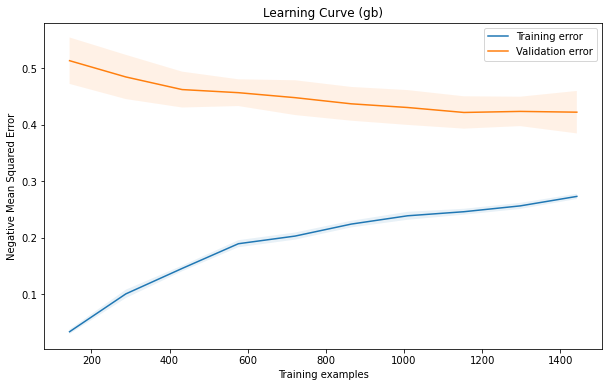

In [25]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (gb)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [26]:
feature_importance_values = gb_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

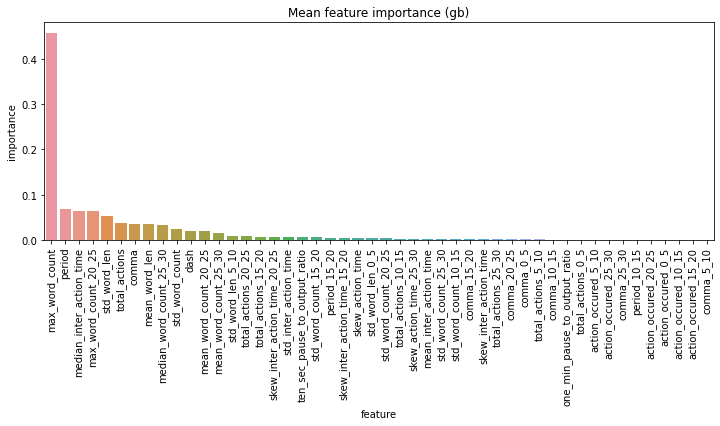

In [27]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (gb)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [28]:
y_pred = gb_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.230168
1       4.0   3.718740
2       3.5   3.988571
3       3.0   3.118282
4       3.5   4.285471
..      ...        ...
446     2.5   4.180597
447     4.5   4.533768
448     3.0   3.425782
449     3.0   2.931296
450     2.5   2.860436

[451 rows x 2 columns]


Average Absolute Error: 0.4810651563439307


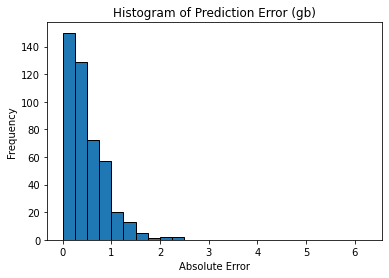

In [29]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (gb)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

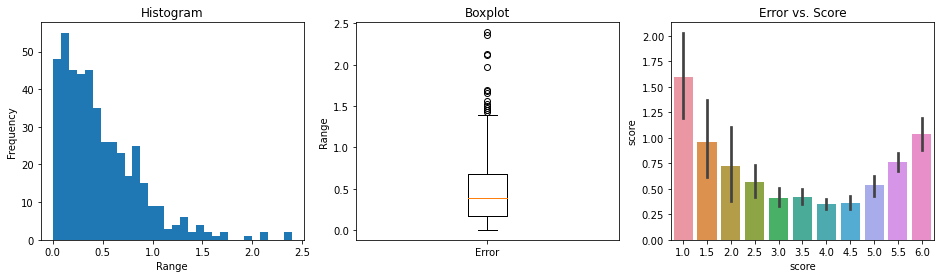

In [30]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

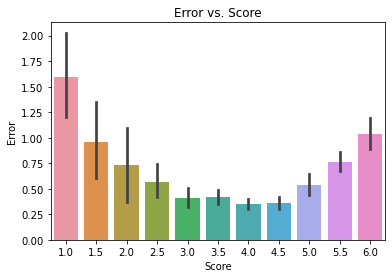

In [31]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## Random Forest

In [32]:
%%time
print("Random Forest (Default)")
rf_reg = RandomForestRegressor()
rf_reg = fit_regressor(rf_reg, X_train, y_train)
evaluate_regressor(rf_reg, X_test, y_test)

Random Forest (Default)
MSE: 0.39947100886917963, RMSE: 0.6320371894668696
Wall time: 2.54 s


In [33]:
%%time
# param_grid = {"n_estimators": [10, 100, 1000],
#               "criterion": ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],
#               "max_features": [None, 'sqrt', 'log2'],
#               "max_depth": [None, 10, 100, 1000],
#               "random_state": [42]}

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

print("Random Forest (Optimal)")
rf_reg = RandomForestRegressor()
rf_reg = grid_search_for_regressor(rf_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(rf_reg, X_train, y_train, X_test, y_test)

Random Forest (Optimal)
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}
training time 0.841 s
predict time 0.023 s
MSE: 0.3946628741685145, RMSE: 0.6282219943368065
Wall time: 30.5 s


RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

In [34]:
rf_reg

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

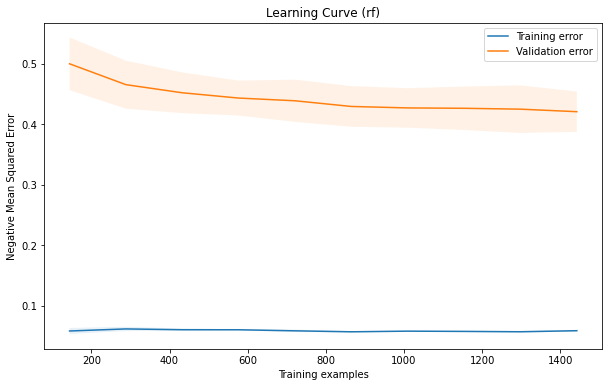

In [35]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (rf)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [36]:
feature_importance_values = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

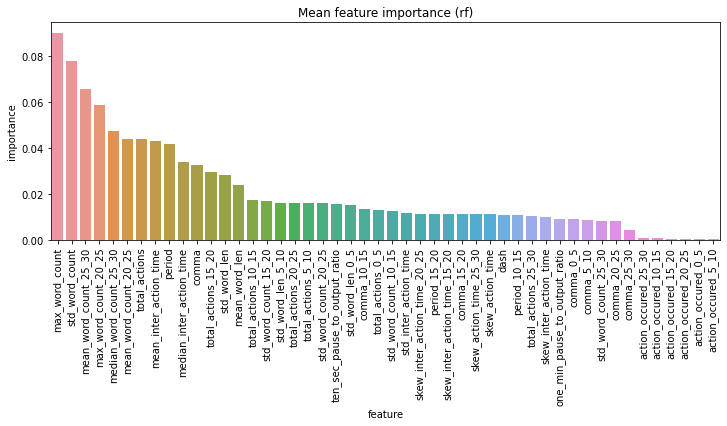

In [37]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (rf)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [38]:
y_pred = rf_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0     3.0575
1       4.0     3.8025
2       3.5     3.7775
3       3.0     3.0150
4       3.5     4.3825
..      ...        ...
446     2.5     3.9800
447     4.5     4.4375
448     3.0     3.1125
449     3.0     3.0150
450     2.5     2.9800

[451 rows x 2 columns]


Average Absolute Error: 0.47851995565410194


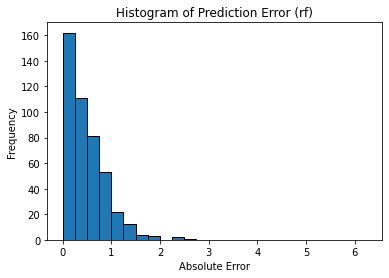

In [39]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (rf)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

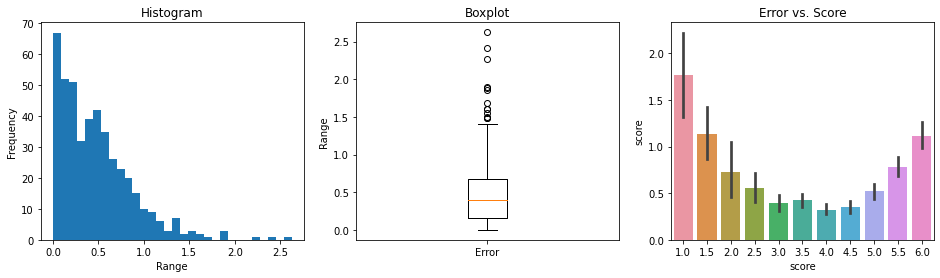

In [40]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

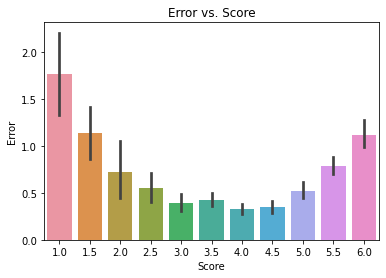

In [41]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## AdaBoost

In [42]:
%%time
print("AdaBoost (Default)")
ab_reg = AdaBoostRegressor()
ab_reg = fit_regressor(ab_reg, X_train, y_train)
evaluate_regressor(ab_reg, X_test, y_test)

AdaBoost (Default)
MSE: 0.42748675833418465, RMSE: 0.6538247152977507
Wall time: 453 ms


In [43]:
%%time
# param_grid = {"n_estimators": [10, 50, 100],
#           "learning_rate": [0.01, 0.1, 1],
#           "random_state": [42],
#           "loss": ['linear', 'square', 'exponential']}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

print("AdaBoost (Optimal)")
ab_reg = AdaBoostRegressor()
ab_reg = grid_search_for_regressor(ab_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(ab_reg, X_train, y_train, X_test, y_test)

AdaBoost (Optimal)
{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100, 'random_state': 42}
training time 1.152 s
predict time 0.012 s
MSE: 0.4188259990413083, RMSE: 0.6471676745954701
Wall time: 33.5 s


AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100,
                  random_state=42)

In [44]:
ab_reg

AdaBoostRegressor(learning_rate=0.1, loss='exponential', n_estimators=100,
                  random_state=42)

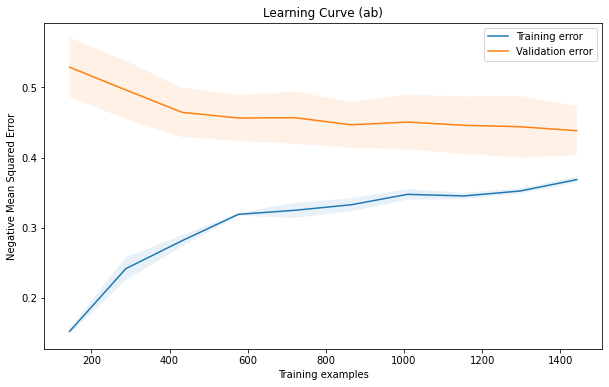

In [45]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    ab_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (ab)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [46]:
feature_importance_values = ab_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(50)

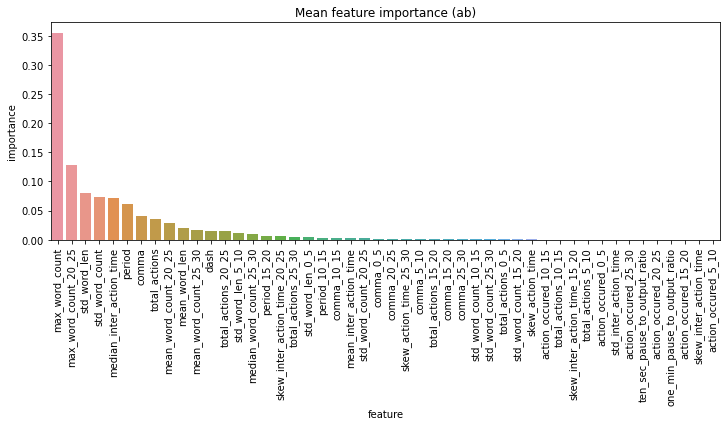

In [47]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean feature importance (ab)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [48]:
y_pred = ab_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.140127
1       4.0   3.550532
2       3.5   4.022222
3       3.0   2.790000
4       3.5   4.276718
..      ...        ...
446     2.5   4.643845
447     4.5   4.597403
448     3.0   3.340095
449     3.0   2.841615
450     2.5   2.638889

[451 rows x 2 columns]


Average Absolute Error: 0.49488076993354685


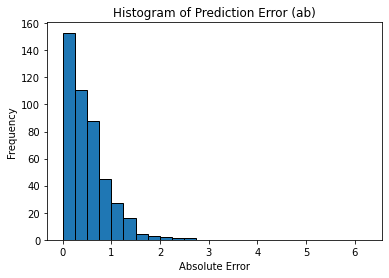

In [49]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (ab)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

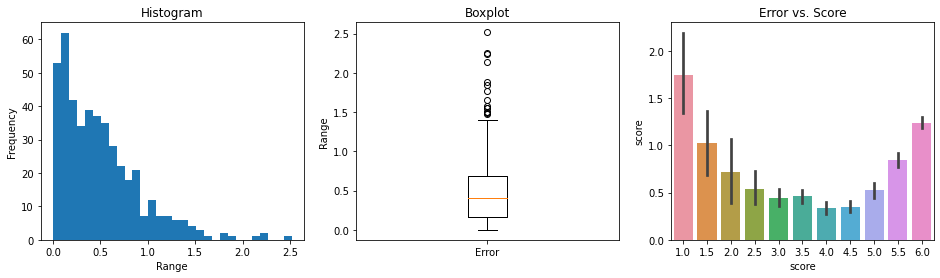

In [50]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

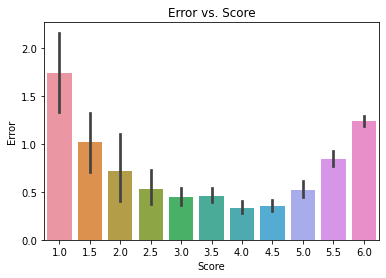

In [51]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Score')
plt.xlabel('Score')
plt.ylabel('Error')

plt.show()

## XGBoost

In [52]:
%%time
print("XGBoost (Default)")
xgb_reg = xgboost.XGBRegressor()
xgb_reg = fit_regressor(xgb_reg, X_train, y_train)
evaluate_regressor(xgb_reg, X_test, y_test)

XGBoost (Default)
MSE: 0.45668633843406814, RMSE: 0.6757857193179418
Wall time: 340 ms


In [53]:
%%time
# param_grid = {"n_estimators": [100, 200, 300],
#           "learning_rate": [0.01, 0.05, 0.1],
#           "max_depth": [3, 4, 5],
#           "random_state": [42]}

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

print("XGBoost (Optimal)")
xgb_reg = xgboost.XGBRegressor()
xgb_reg = grid_search_for_regressor(xgb_reg, param_grid, X_train, y_train)
train_and_evaluate_regressor(xgb_reg, X_train, y_train, X_test, y_test)

XGBoost (Optimal)
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'random_state': 42}
training time 0.063 s
predict time 0.004 s
MSE: 0.38703118171017276, RMSE: 0.6221183020215469
Wall time: 28.6 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

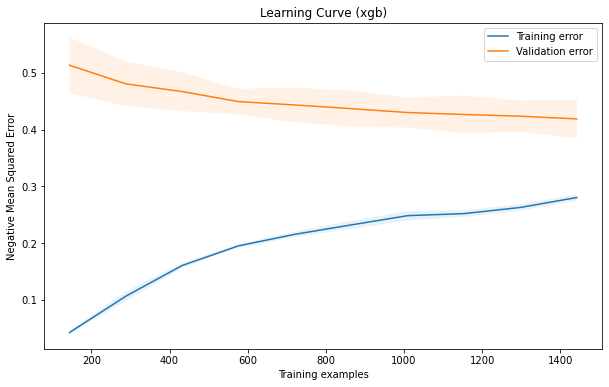

In [55]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (xgb)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [56]:
feature_importance_values = xgb_reg.feature_importances_
feature_importance_df = pd.DataFrame({'feature': columns_list, 'importance': feature_importance_values})
# feature_importance_df.to_csv('feature_importance.csv', index=False)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(30)

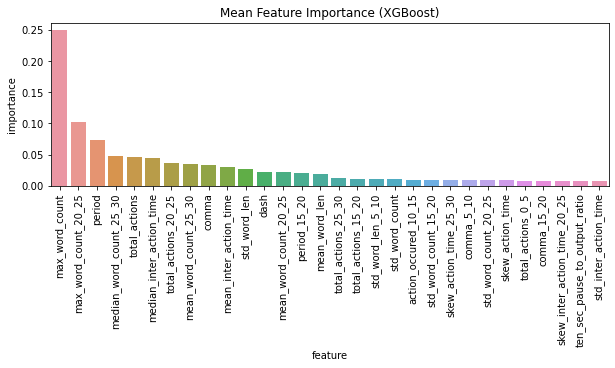

In [57]:
plt.figure(figsize=(10, 3))

ax = sns.barplot(data=feature_importance_df, x='feature', y='importance')
ax.set_title(f"Mean Feature Importance (XGBoost)")
#ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('Feature.pdf', dpi=1000, bbox_inches='tight')
plt.show()

In [58]:
y_pred = xgb_reg.predict(X_test)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.321092
1       4.0   3.775328
2       3.5   3.977204
3       3.0   3.061734
4       3.5   4.344270
..      ...        ...
446     2.5   4.039059
447     4.5   4.520268
448     3.0   3.353588
449     3.0   2.905314
450     2.5   2.860676

[451 rows x 2 columns]


Average Absolute Error: 0.48072469763110853


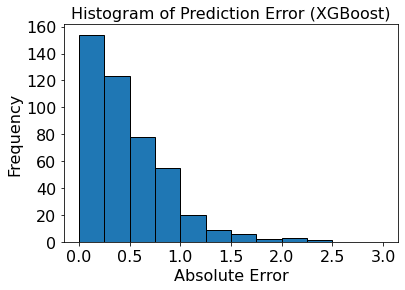

In [59]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 3.25, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (XGBoost)', fontsize=16)
plt.xlabel("Absolute Error", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('Error.pdf', dpi=1000, bbox_inches='tight')
average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

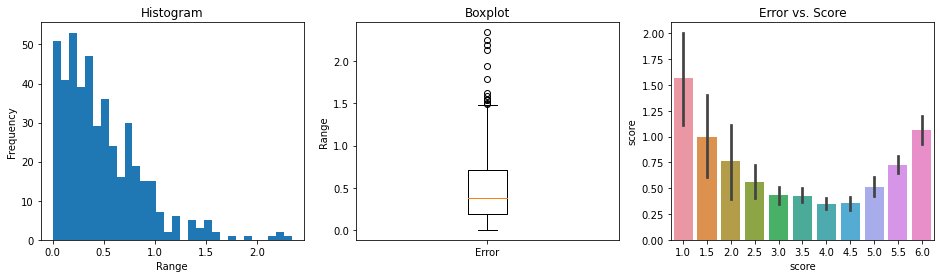

In [60]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

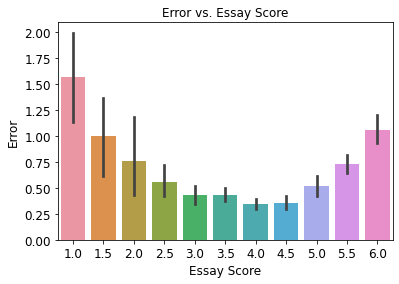

In [61]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=12)
plt.xlabel('Essay Score', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Error.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## Neural Network

In [62]:
%%time
X_train_scaled = preprocessing.scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)
X_test_scaled = preprocessing.scale(X_test, axis=0, with_mean=True, with_std=True, copy=True)

print("Neural Network (Default)")
nn_reg = MLPRegressor()
nn_reg = fit_regressor(nn_reg, X_train_scaled, y_train)
evaluate_regressor(nn_reg, X_test_scaled, y_test)

Neural Network (Default)
MSE: 0.5515888988302728, RMSE: 0.7426903115230956
Wall time: 1.07 s


In [63]:
%%time
# param_grid = {"activation": ['identity', 'logistic', 'tanh', 'relu'],
#               "solver": ['lgfgs', 'sgd', 'adam'],
#               "alpha": [0.001, 0.01, 0.1],
#               "random_state": [42]}

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'random_state': [42],
    'max_iter': [500]
}

print("Neural Network (Optimal)")
nn_reg = MLPRegressor()
nn_reg = grid_search_for_regressor(nn_reg, param_grid, X_train_scaled, y_train)
train_and_evaluate_regressor(nn_reg, X_train_scaled, y_train, X_test_scaled, y_test)

Neural Network (Optimal)
{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'max_iter': 500, 'random_state': 42, 'solver': 'adam'}
training time 0.464 s
predict time 0.001 s
MSE: 0.4147998910188669, RMSE: 0.6440496029180259
Wall time: 5min 48s


MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(50,),
             max_iter=500, random_state=42)

In [64]:
nn_reg

MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=(50,),
             max_iter=500, random_state=42)

C:\Users\pinse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pinse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pinse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\pinse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


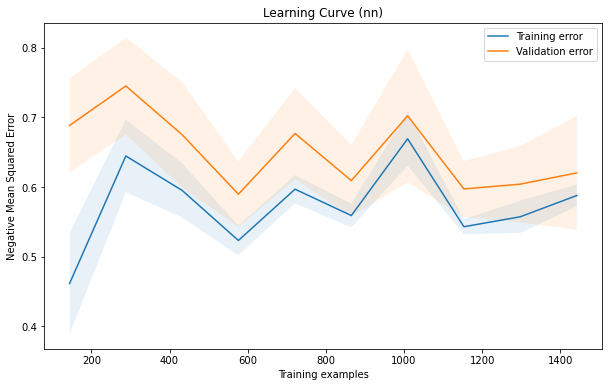

In [65]:
# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    nn_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Use an appropriate scoring metric
    cv=5  # Number of cross-validation folds
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.title('Learning Curve (nn)')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')  # Adjust the y-axis label based on your task
plt.legend(loc='best')
plt.show()

In [66]:
y_pred = nn_reg.predict(X_test_scaled)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.148269
1       4.0   3.701744
2       3.5   3.742914
3       3.0   3.147455
4       3.5   4.267363
..      ...        ...
446     2.5   3.772186
447     4.5   4.375032
448     3.0   3.131554
449     3.0   3.026886
450     2.5   2.971652

[451 rows x 2 columns]


Average Absolute Error: 0.5024522775979163


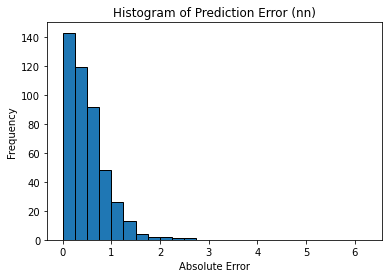

In [67]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (nn)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

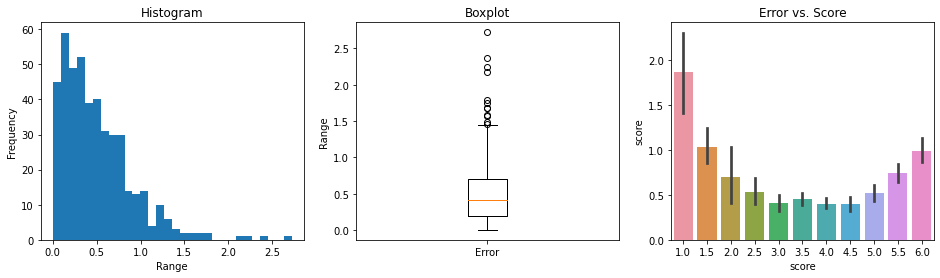

In [68]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

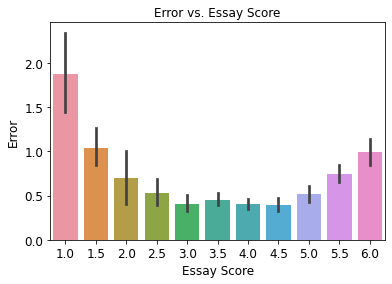

In [69]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=12)
plt.xlabel('Essay Score', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Error2.pdf', dpi=1000, bbox_inches='tight')
plt.show()

## SVR

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
import numpy as np
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Standardize the features
scaler = StandardScaler()
X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.transform(X_test)
# Define the hyperparameters to tune
hyperparameters = {'C': np.logspace(-4, 4, 10, 20), 'kernel': ['rbf']}
# Create a SVR object
svr = SVR()
# Create a GridSearchCV object
clf = GridSearchCV(svr, hyperparameters, cv=5, verbose=0)
# Fit the model to the training data
clf.fit(X_train_svr, y_train)
# Make predictions on the testing set
y_pred = clf.predict(X_test_svr)
# Create a DataFrame
df2 = pd.DataFrame({'Predicted Values': y_pred, 'Target Values': y_test})
# Print the DataFrame
print(df2)
# Calculate and print the Mean Squared Error of the model on the testing set
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Calculate and print the Root Mean Squared Error of the model on the testing set
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)
# Print the best parameters
print('Best parameters:', clf.best_params_)

      Predicted Values  Target Values
2063          3.378186            3.0
1263          3.986558            4.0
2127          3.530427            3.5
599           3.211797            3.0
464           4.266907            3.5
...                ...            ...
1880          3.668467            2.5
427           4.373719            4.5
374           3.452299            3.0
105           3.545150            3.0
1966          3.158851            2.5

[451 rows x 2 columns]
Mean Squared Error: 0.4749272590892118
Root Mean Squared Error: 0.689149663780816
Best parameters: {'C': 0.3593813663804626, 'kernel': 'rbf'}


In [81]:
y_pred = clf.predict(X_test_svr)
compare = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred)], axis=1)
compare.columns = ['Actual', 'Predicted']
print(compare)

     Actual  Predicted
0       3.0   3.378186
1       4.0   3.986558
2       3.5   3.530427
3       3.0   3.211797
4       3.5   4.266907
..      ...        ...
446     2.5   3.668467
447     4.5   4.373719
448     3.0   3.452299
449     3.0   3.545150
450     2.5   3.158851

[451 rows x 2 columns]


Average Absolute Error: 0.5218701458046455


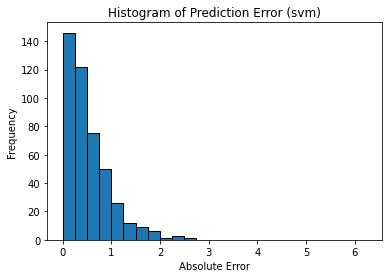

In [82]:
error = abs(y_pred - y_test)
plt.hist(error, bins=np.arange(0, 6.5, 0.25), edgecolor='black')
plt.title('Histogram of Prediction Error (svm)')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

average_error = np.mean(error)
print(f"Average Absolute Error: {average_error}")

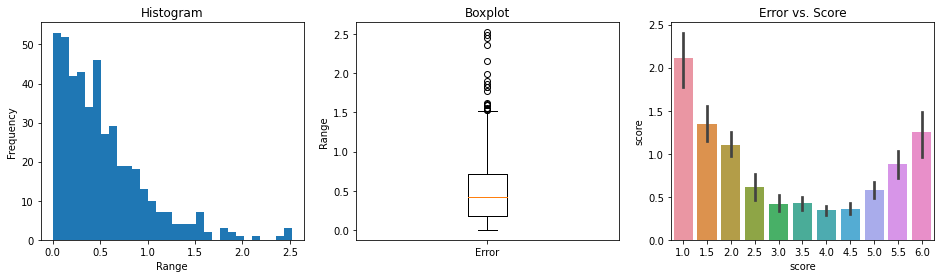

In [83]:
#feature = df["total_actions"]
fig, ax = plt.subplots(1,3, figsize=(16,4))

# Histogram
ax[0].set_title('Histogram')
ax[0].set_xlabel('Range')
ax[0].set_ylabel('Frequency')
ax[0].hist(error, bins=30)

# Boxplot
ax[1].set_title('Boxplot')
ax[1].set_ylabel('Range')
ax[1].boxplot(error)
ax[1].set_xticklabels(['Error'])

# Catplot
ax[2].set_title('Error vs. Score')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Error')
sns.barplot(data=None, x=y_test, y=error, ax=ax[2])

plt.show()

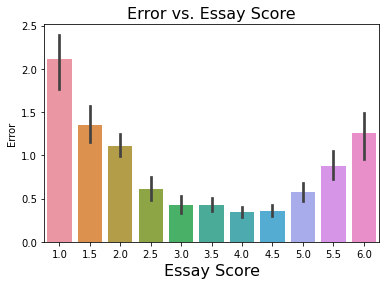

In [84]:
# Catplot
sns.barplot(data=None, x=y_test, y=error)
plt.title('Error vs. Essay Score', fontsize=16)
plt.xlabel('Essay Score', fontsize=16)
plt.ylabel('Error')

plt.show()

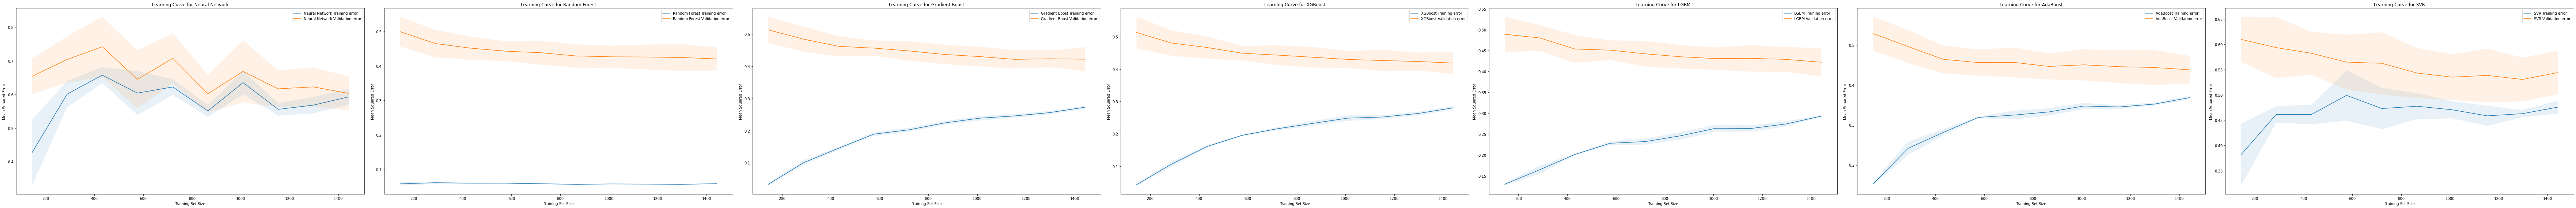

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Assume X_train, y_train are already defined and models list is given
models = [nn_reg, rf_reg, gb_reg, xgb_reg, ab_reg, clf]  # Replace with your models
model_names = ['Neural Network', 'Random Forest', 'Gradient Boost', 'XGBoost', 'AdaBoost', 'SVR']  # Replace with your model names
# Number of rows and columns for subplots
n_rows = 1
n_cols = len(models)
# Create a figure for subplots
plt.figure(figsize=(14 * n_cols, 8))
for idx, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(n_rows, n_cols, idx)
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    # Calculate mean and standard deviation for training set scores
    train_mean = -train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    # Calculate mean and standard deviation for validation set scores
    validation_mean = -validation_scores.mean(axis=1)
    validation_std = validation_scores.std(axis=1)
    # Plot learning curves
    plt.plot(train_sizes, train_mean, label=f'{name} Training error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, validation_mean, label=f'{name} Validation error')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1)
    plt.title(f'Learning Curve for {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
plt.tight_layout()
plt.show()

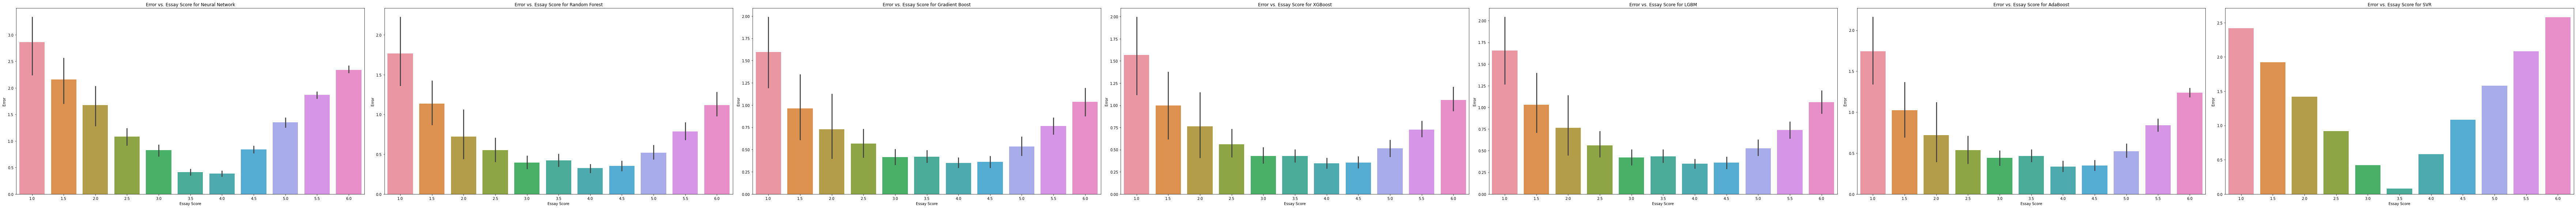

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Assume X_train, y_train are already defined and models list is given
models = [nn_reg, rf_reg, gb_reg, xgb_reg, ab_reg, clf]  # Replace with your models
model_names = ['Neural Network', 'Random Forest', 'Gradient Boost', 'XGBoost', 'AdaBoost', 'SVR']  # Replace with your model names
# Number of rows and columns for subplots
n_rows = 1
n_cols = len(models)
# Create a figure for subplots
plt.figure(figsize=(14 * n_cols, 8))
for idx, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(n_rows, n_cols, idx)
    y_pred = model.predict(X_test)
    error = abs(y_pred - y_test)
    sns.barplot(data=None, x=y_test, y=error)
    plt.title(f'Error vs. Essay Score for {name}')
    plt.xlabel('Essay Score')
    plt.ylabel('Error')
plt.tight_layout()
plt.show()

## Result

In [90]:
print("gb")
evaluate_regressor(gb_reg, X_test, y_test)
print("rf")
evaluate_regressor(rf_reg, X_test, y_test)
print("ab")
evaluate_regressor(ab_reg, X_test, y_test)
print("xgb")
evaluate_regressor(xgb_reg, X_test, y_test)
print("nn")
evaluate_regressor(nn_reg, X_test_scaled, y_test)
print("svm")
print("MSE:", mse, ", RMSE:", rmse)

gb
MSE: 0.38951331221372104, RMSE: 0.6241100161139228
rf
MSE: 0.3946628741685145, RMSE: 0.6282219943368065
ab
MSE: 0.4188259990413083, RMSE: 0.6471676745954701
xgb
MSE: 0.38703118171017276, RMSE: 0.6221183020215469
nn
MSE: 0.4147998910188669, RMSE: 0.6440496029180259
svm
MSE: 0.4749272590892118 , RMSE: 0.689149663780816
